# Course Review: Clustering 
  
  
*Nur Andi Setiabudi*  
*August 6, 2021*

---

# Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

from scipy.cluster.hierarchy import dendrogram, linkage


import warnings
import os
warnings.filterwarnings("ignore")

py.offline.init_notebook_mode(connected = True)

# Data Exploration

In [2]:
df = pd.read_csv(r'../data/Customers.csv')
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualization

In [5]:
plt.style.use('seaborn')

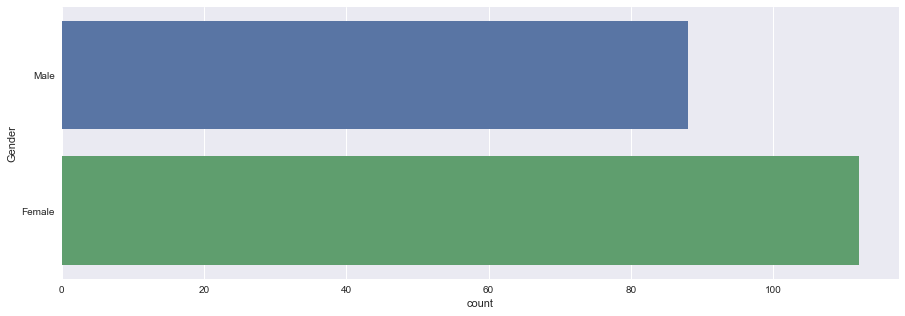

In [6]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

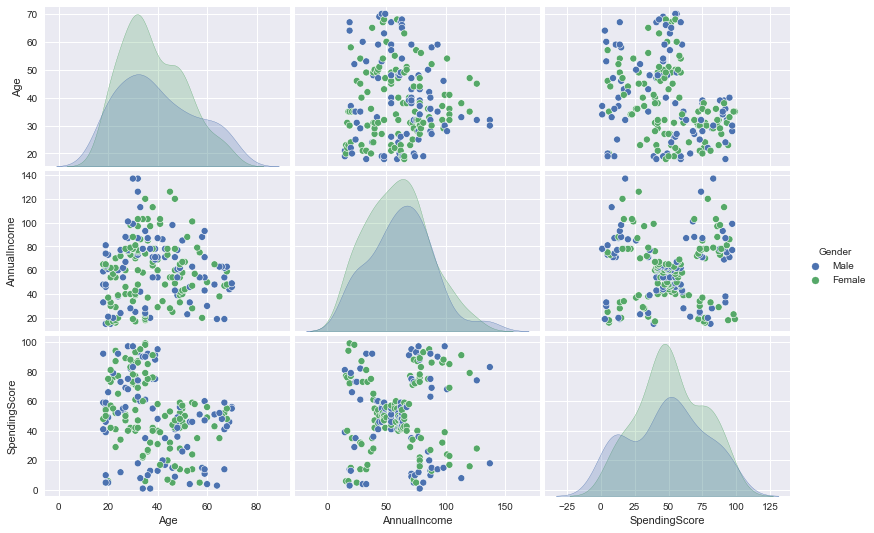

In [7]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

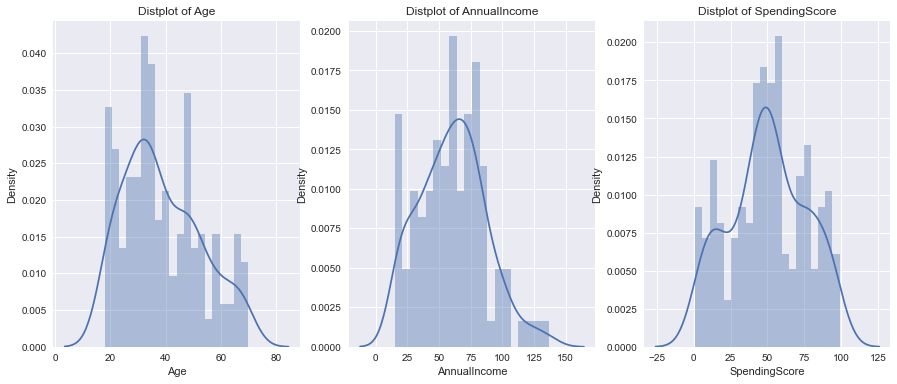

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

# Standardized Variable (Optional but Strongly Recommended)

In [9]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

standardize = StandardScaler()
X_std = pd.DataFrame(standardize.fit_transform(X))
X_std.columns = X.columns


# <font color='red'>K Means Clustering</font>


# K Means: with 2 variables with speculated k

In [10]:
X_is = X_std[['AnnualIncome' , 'SpendingScore']].values

In [11]:
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, random_state= 123)
k_means.fit(X_is)

centroids = k_means.cluster_centers_

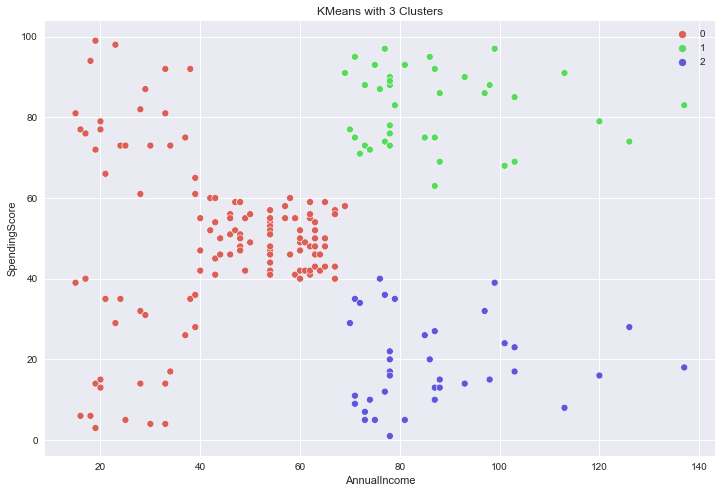

In [12]:
Segment = k_means.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['AnnualIncome'], X['SpendingScore'], hue=Segment,
                palette=sns.color_palette('hls', k))
plt.title('KMeans with {} Clusters'.format(k))
plt.show()

In [13]:
centroids = X[['AnnualIncome','SpendingScore']].groupby(Segment, as_index=False).mean()
centroids

,AnnualIncome,SpendingScore
0,44.154472,49.829268
1,86.538462,82.128205
2,87.000000,18.631579


# K Means (2): 2 Variables with Elbow Method and Silhouette Score to Determine k

In [14]:
def k_means_inertia_silhouette(X, k_max = 10, init = 'k-means++'):
    inertia = []
    silhouette = []
    for k in range(2, k_max):
        km =  KMeans(init = init, n_clusters = k, random_state= 123)
        km.fit(X)
        inertia.append(km.inertia_)
        silhouette.append(silhouette_score(X, km.labels_))
    
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(2 , k_max) , inertia , 'o')
    plt.plot(np.arange(2 , k_max) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.title('The Elbow method using Inertia for each number of cluster')
    plt.show()

    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(2 , k_max) , silhouette , 'o')
    plt.plot(np.arange(2 , k_max) , silhouette , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette')
    plt.title('Silhouette score for each number of cluster')
    plt.show()
    
    return inertia, silhouette

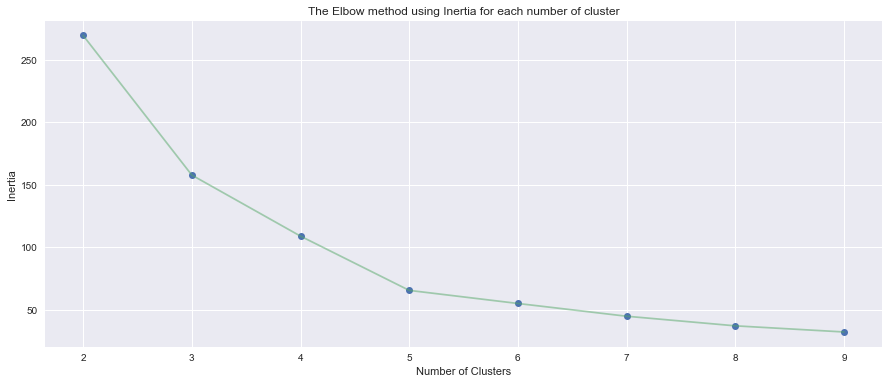

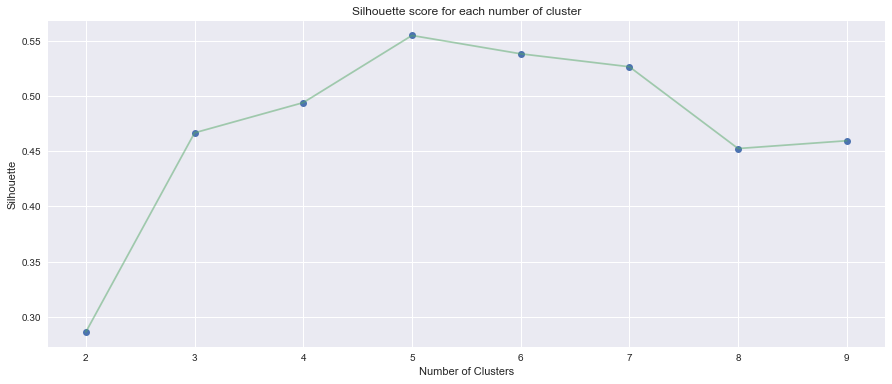

In [15]:
inertia, silhouette = k_means_inertia_silhouette(X = X_is)

In [16]:
k = 5
k_means = KMeans(init = "k-means++", n_clusters = k, random_state= 123)
k_means.fit(X_is)

KMeans(n_clusters=5, random_state=123)

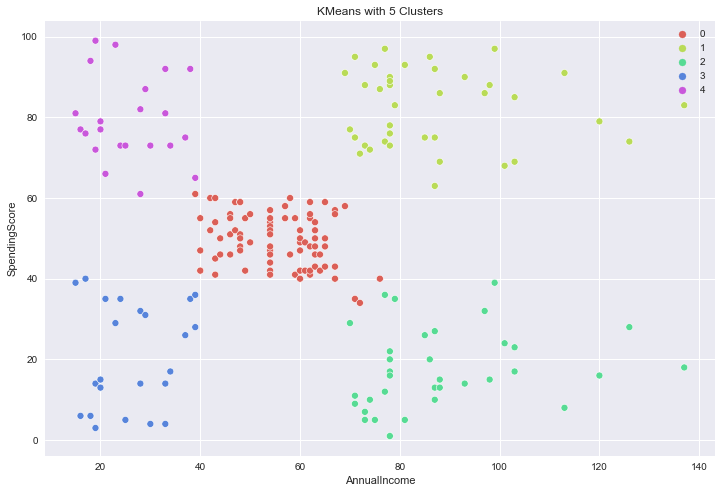

In [17]:
Segment = k_means.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(X['AnnualIncome'], X['SpendingScore'], hue=Segment,
                palette=sns.color_palette('hls', k))
plt.title('KMeans with {} Clusters'.format(k))
plt.show()

In [18]:
centroids = X[['AnnualIncome','SpendingScore']].groupby(Segment, as_index=False).mean()
centroids

,AnnualIncome,SpendingScore
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636


# K Means (3): 3 Variables with Elbow Method and Silhouette to Determine k

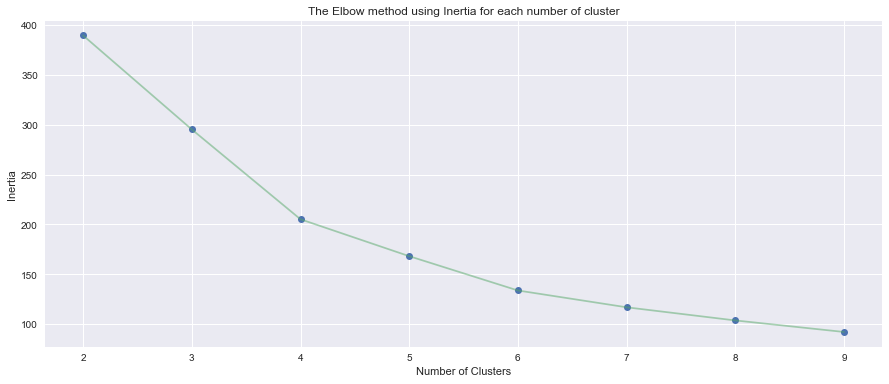

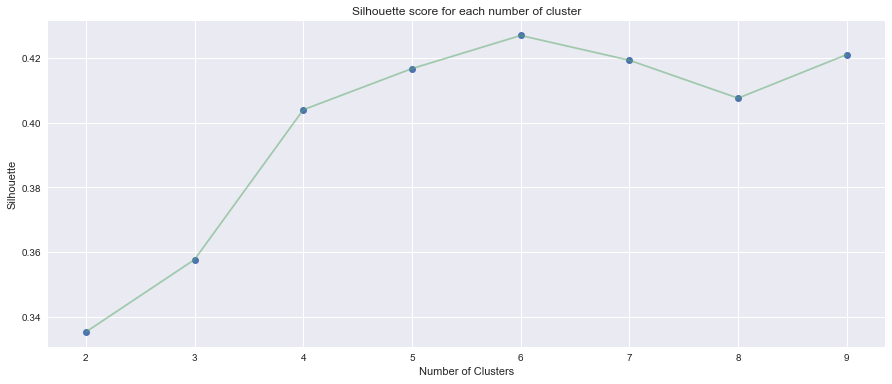

In [19]:
inertia, silhouette = k_means_inertia_silhouette(X_std, k_max = 10, init = 'k-means++')

In [20]:
k = 6
k_means = KMeans(init = "k-means++", n_clusters = k, random_state= 123)
k_means.fit(X_std)

KMeans(n_clusters=6, random_state=123)

In [21]:
Segment = k_means.labels_
X.groupby(Segment, as_index=False).mean()

,Age,AnnualIncome,SpendingScore
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.000000,25.260870,77.608696
3,27.000000,56.657895,49.131579
4,41.264706,88.500000,16.764706
5,45.523810,26.285714,19.380952


In [22]:
X['Segment'] = list(map(str, Segment))
fig = px.scatter_3d(X, x='Age', y='AnnualIncome', z='SpendingScore', color='Segment',
                   opacity = 0.8, height=800)
fig.show()

# <font color='red'>Hierarchical Clustering: Agglomerative</font>

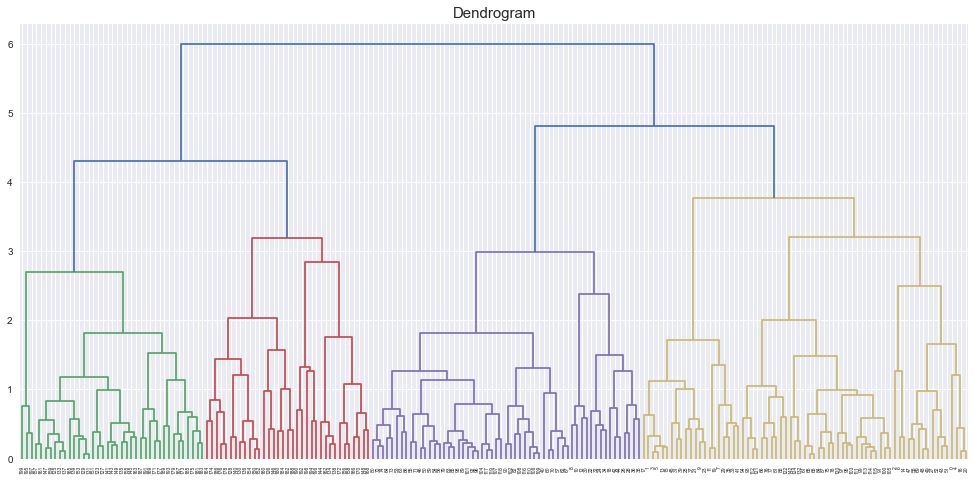

In [23]:
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(X_std, method = 'complete'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [24]:
agglo_cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
Segment = agglo_cluster.fit_predict(X_std)
Segment

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [25]:
X.groupby(Segment, as_index=False).mean()

,Age,AnnualIncome,SpendingScore
0,27.275362,42.782609,56.376812
1,41.685714,88.228571,17.285714
2,55.333333,47.315789,41.087719
3,32.692308,86.538462,82.128205


In [26]:
X['Segment'] = list(map(str, Segment))
fig = px.scatter_3d(X, x='Age', y='AnnualIncome', z='SpendingScore', color='Segment',
                   opacity = 0.8, height=800)
fig.show()

# <font color='red'>Density-based Clustering: DBSCAN</font>

We will use simulated data to exercise DBSCAN

In [27]:
centers = [[1, 1], [-1, -1], [1, -1]]  
S, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4, 
                            random_state=0) 

S = StandardScaler().fit_transform(S)

In [28]:
db = DBSCAN(eps=0.3, min_samples=20).fit(S)

In [29]:
# Number of clusters in labels, ignoring noise if present.
# the label -1 is considered as noise by the DBSCAN algorithm

labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 39


In [30]:
homogeneity =homogeneity_score(labels_true, labels)
print("Homogeneity: %0.3f" % homogeneity)

Homogeneity: 0.914


In [31]:
# Create an array of booleans using the labels from db.

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

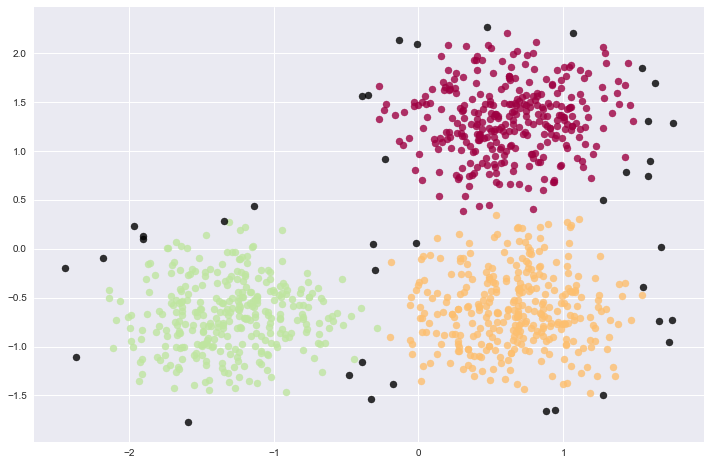

In [32]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] 

plt.figure(figsize=(12, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = S[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.8)

    # Plot the outliers
    xy = S[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.8)

### Lets compare to K-Means

In [33]:
k = 3
k_means = KMeans(init = "k-means++", n_clusters = k, random_state= 123)
k_means.fit(S)

KMeans(n_clusters=3, random_state=123)

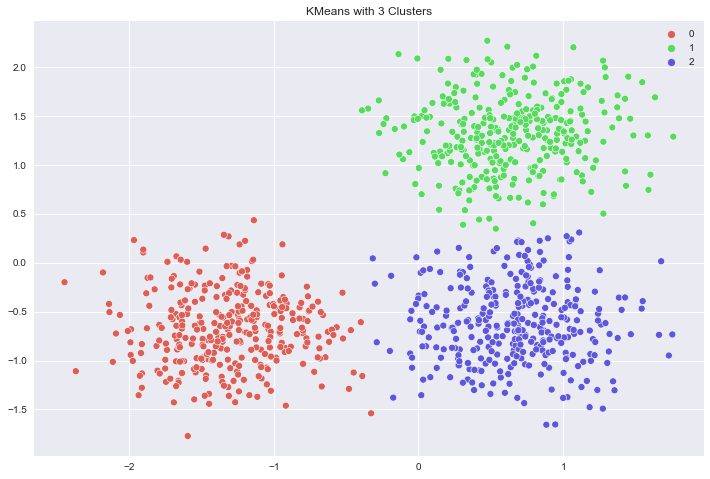

In [34]:
Segment = k_means.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(S[:,0], S[:,1], hue=Segment,
                palette=sns.color_palette('hls', k))
plt.title('KMeans with {} Clusters'.format(k))
plt.show()

----

# <font color='red'>Task</font>

A simple yet powerful marketing technique is an analysis utilizing recency (how recent was the customer's last purchase), frequency (how often did the customer make a purchase in a given period) and monetary (how much money did the customer spend in a given period) data to identify the best customers and perform targeted marketing campaigns. 

As data scientist you are asked to segment the customers using transaction data and profile them based-on their characteristics (recency, frequency, monetary). After you find the segments, name them using understandable words so marketing team can easily create campaign strategies.

**Data:**
`../data/transactions.csv`

**Hints:** 
For each customer id, generate time difference between their last transaction and today. You should also calculate number of transaction and total amount of spending. 

**Output:**
Push the *executed* notebook into your github repo and submit the URL to ketua kelas no later than August 21, 2021. Note that notebook must contain explanatory analysis and clustering as well as story about your findings.

**Goodluck!**



---

Data source (with a minor modification): [this](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv) and [this](https://www.kaggle.com/regivm/retailtransactiondata?select=Retail_Data_Transactions.csv)